# Análisis del impacto del clima en los viajes de fin de semana en Chicago

__Análisis Exploratorio de Datos__

__`/datasets/project_sql_result_01.csv`:__
- `company_name`: _nombre_ de la empresa de taxis
- `trips_amount`: _número de viajes_ de cada compañía de taxis el 15 y 16 de noviembre de 2017


__`/datasets/project_sql_result_04.csv`:__
- `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes
- `average_trips`: el _promedio de viajes_ que terminaron en cada barrio en noviembre de 2017


__`/datasets/project_sql_result_07.csv`:__
- `start_ts`: _fecha y hora_ de la recogida
- `weather_conditions`: _condiciones climáticas_ en el momento en el que comenzó el viaje
- `duration_seconds`: _duración_ del viaje en segundos


- __Importar__ los archivos
- __Estudiar los datos__ que contienen
- Asegurarse de que los __tipos de datos__ sean correctos
- Identificar los __10 principales barrios__ en términos de finalización del recorrido
- __Trazar gráficos__: _empresas_ de taxis y _número_ de viajes, los _10 barrios principales_ por número de finalizaciones

__Prueba de Hipótesis__

La __duración promedio__ de los viajes desde el __Loop__ hasta el __Aeropuerto Internacional O'Hare__ cambia los __sábados lluviosos__

# Importar los Archivos

In [1]:
# cargar las librerias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from IPython.display import display

In [2]:
# cargar los datos

df_01_original = pd.read_csv('./project_sql_result_01.csv')
df_04_original = pd.read_csv('./project_sql_result_04.csv')
df_07_original = pd.read_csv('./project_sql_result_07.csv')

In [3]:
# generar una copia de los DataFrames originales

df_01 = df_01_original.copy()
df_04 = df_04_original.copy()
df_07 = df_07_original.copy()

# Estudiar los Datos

## `sql_result_01` 

In [4]:
# mostrar la información general de `sql_result_01` 

df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# imprimir una muestra de datos de `sql_result_01` 

df_01.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [6]:
# mostrar el resumen estádistico de `sql_result_01` 

df_01.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


## `sql_result_04` 

In [7]:
# mostrar la información general de `sql_result_04`

df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
# imprimir una muestra de datos de `sql_result_04` 

df_04.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [9]:
# mostrar el resumen estádistico de `sql_result_04` 

df_04.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


## `sql_result_07` 

In [10]:
# mostrar la información general de `sql_result_07` 

df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
# imprimir una muestra de datos de `sql_result_07` 

df_07.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [12]:
# mostrar el resumen estádistico de `sql_result_07` 

df_07.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


## Evaluación:

- En `df_01` hay __64 entradas__ relativas al __nombre__ de la impresa y el __número__ de viajes
- En `df_04` hay __94 entradas__ relativas al __destino__ y el __promedio__ de los viajes
- En `df_07` hay __1068 entradas__ relativas a la __fecha y hora__, __condiciones climáticas__ y __duración__ de los viajes
- No hay __valores ausentes__ en los DataFrames
- Necesitamos __convertir__ los valores en la columna `start_ts` de `df_07` a __formato datetime__
- Necesitamos __convertir__ los valores en la columna `duration_seconds` de `df_07` a __números enteros__

# Tipos de Datos

In [13]:
# convertir la columna `start_ts` a formato datetime

df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])

In [14]:
# convertir los valores en la columna `duration_seconds` a número enteros

df_07['duration_seconds'] = df_07['duration_seconds'].astype(int)

In [15]:
# mostrar que `df_07` está actualizado correctamente

df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


## Evaluación:

- Convertimos los valores en la columna `start_ts` de `df_07` a __formato datetime__
- Convertimos los valores en la columna `duration_seconds` de `df_07` a __números enteros__

# Clasificación de Datos

In [16]:
# identificar los 10 principales barrios en términos de finalización del recorrido

top_10_barrios = df_04.sort_values(by='average_trips', ascending=False).head(10)

display('Los 10 principales barrios en términos de finalización del recorrido:', top_10_barrios)

'Los 10 principales barrios en términos de finalización del recorrido:'

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [17]:
# filtrar los viajes por condiciones climáticas

df_rainy = df_07[(df_07['weather_conditions'] == 'Bad') & (df_07['start_ts'].dt.dayofweek == 5)]
df_non_rainy = df_07[(df_07['weather_conditions'] == 'Good') & (df_07['start_ts'].dt.dayofweek == 5)]

In [18]:
# imprimir una muestra de datos por el DataFrame `df_rainy`

print('Filas y columnas del DataFrame:', df_rainy.shape)
df_rainy.head(10)

Filas y columnas del DataFrame: (180, 3)


,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969
30,2017-11-18 12:00:00,Bad,1980
34,2017-11-04 17:00:00,Bad,2460
51,2017-11-04 16:00:00,Bad,2760
52,2017-11-18 12:00:00,Bad,2460
54,2017-11-18 10:00:00,Bad,1440
65,2017-11-04 18:00:00,Bad,2363
70,2017-11-18 16:00:00,Bad,3000
78,2017-11-04 16:00:00,Bad,3120
92,2017-11-18 07:00:00,Bad,1511


In [19]:
# imprimir una muestra de datos por el DataFrame `df_non_rainy`

print('Filas y columnas del DataFrame:', df_non_rainy.shape)
df_non_rainy.head(10)

Filas y columnas del DataFrame: (888, 3)


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
5,2017-11-11 04:00:00,Good,1320
7,2017-11-18 11:00:00,Good,2280
8,2017-11-11 14:00:00,Good,2460
9,2017-11-11 12:00:00,Good,2040
10,2017-11-18 06:00:00,Good,1500


## Evaluación:

- Encontramos los __10 principales barrios__ en términos de finalización del recorrido
- Filtramos los viajes por __condiciones climáticas__

# Análisis de Datos

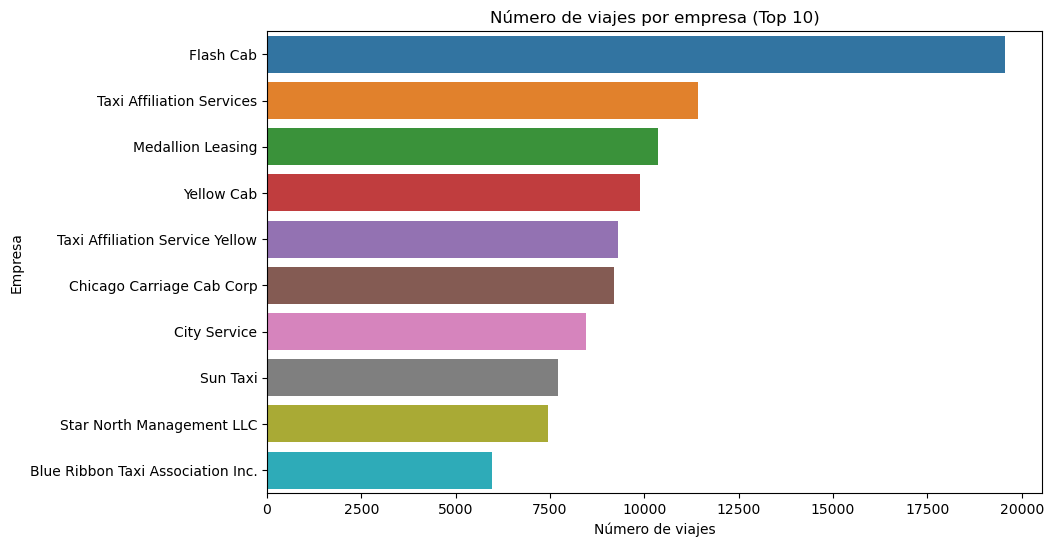

In [20]:
# trazar un gráfico de barras para mostrar el número de viajes por empresa (Top 10) 

plt.figure(figsize=(10, 6))
sns.barplot(x='trips_amount', y='company_name', data=df_01.sort_values(by='trips_amount', ascending=False).head(10))
plt.title('Número de viajes por empresa (Top 10)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa')
plt.show()

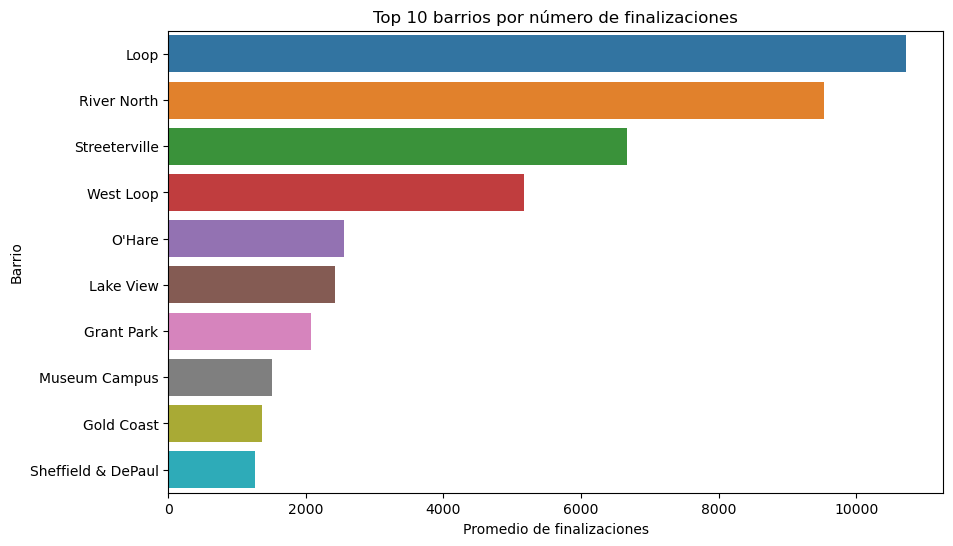

In [21]:
# trazar un gráfico de barras para mostrar los 10 principales barrios por número de finalizaciones

plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=df_04.sort_values(by='average_trips', ascending=False).head(10))
plt.title('Top 10 barrios por número de finalizaciones')
plt.xlabel('Promedio de finalizaciones')
plt.ylabel('Barrio')
plt.show()

## Evaluación:

- Encontramos las empresas con el __mayor número de viajes__
- Encontramos los __destinos más requeridos__

# Prueba de Hípotesis

In [22]:
# prueba de hípotesis

duraciones_lluvia = df_rainy['duration_seconds']
duraciones_no_lluvia = df_non_rainy['duration_seconds']

t_stat, p_valor = ttest_ind(duraciones_lluvia, duraciones_no_lluvia)

alpha = 0.05

if p_valor < alpha:
    print(f"El p-valor ({p_valor}) es menor que el valor alpha ({alpha}). Se rechaza la hipótesis nula.")
else:
    print(f"El p-valor ({p_valor}) es mayor que el valor alpha ({alpha}). No se rechaza la hipótesis nula.")

El p-valor (6.517970327099473e-12) es menor que el valor alpha (0.05). Se rechaza la hipótesis nula.


## Evaluación:

__Hipótesis nula (H0):__

- La __duración promedio__ de los viajes desde el _Loop_ hasta el _Aeropuerto Internacional O'Hare_ es la __misma__ en días lluviosos y no lluviosos

__La hipótesis alternativa (H1):__ 
- La __duración promedio__ de los viajes es __diferente__ en días lluviosos y no lluviosos


- El __p-valor__ obtenido es __6.52e-12__, lo cual es extremadamente pequeño
- El __p-valor__ es __mucho menor__ que el __valor alpha__ (0.05)
- Concluimos que hay evidencia estadística suficiente para __rechazar la hipótesis nula__
- Podemos decir que hay una __diferencia significativa__ en la duración promedio de los viajes entre sábados lluviosos y no lluviosos

# Conclusiones

El __análisis exploratorio__ de datos nos permitió descubrir algunas informaciones interesantes:

- El __promedio de viajes__ entre las diferentes empresas en dos días es alrededor de __2145__
- En __promedio__ la __duración de los viajes__ es aproximadamente de __34 minutos__
- Encontramos que en la __mayoría de los casos__ las __condiciones climáticas__ son __buenas__ 
- La empresa con el __mayor número de viajes__ es __Flash Cabs__
- El __principal barrio__ por número de finalizaciones es el __Loop__

Por fin a través de una prueba de hipótesis __t student__ aclaramos que hay una __diferencia significativa__ en la duración promedio de los viajes entre sábados  lluviosos y no lluviosos.